In [1]:
import torch
import numpy as np
import json
import h5py
import cv2
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

/opt/anaconda3/envs/mymcnn/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/mymcnn/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: /opt/anaconda3/envs/mymcnn/lib/python3.10/site-packages/torchvision/image.so
  Expected in: /opt/anaconda3/envs/mymcnn/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
from dataset import CrowdCountingDataset

In [41]:
# 定义数据增强操作
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(        # 标准化
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [42]:
train_data = CrowdCountingDataset('../../shanghaitech/part_A_train.json', transform=transform)

In [43]:
dataloader = DataLoader(train_data, batch_size=1, shuffle=True)

In [44]:
data_iter = iter(dataloader)
imgs, densitys = data_iter.__next__()

In [26]:
from matplotlib import cm as CM

In [27]:
densitys.shape

torch.Size([1, 224, 224])

In [52]:
den = densitys[0]

In [29]:
den.shape

torch.Size([224, 224])

In [45]:
img = imgs[0]

In [33]:
img.shape

torch.Size([3, 224, 224])

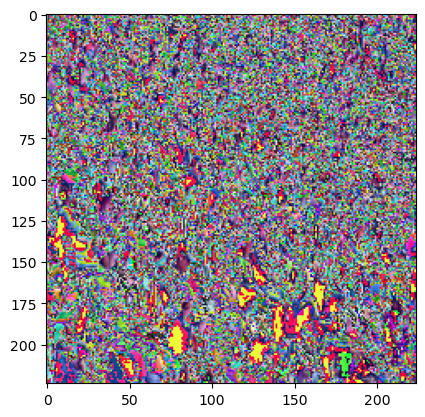

In [46]:
transform = transforms.Compose([transforms.ToPILImage(), ])
img = transform(img)
plt.imshow(img)

In [48]:
den = den.unsqueeze(1)

In [49]:
den.shape

torch.Size([1, 1, 224, 224])

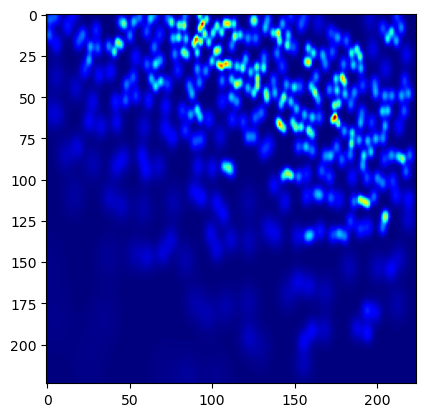

In [53]:
plt.imshow(den, cmap=CM.jet)